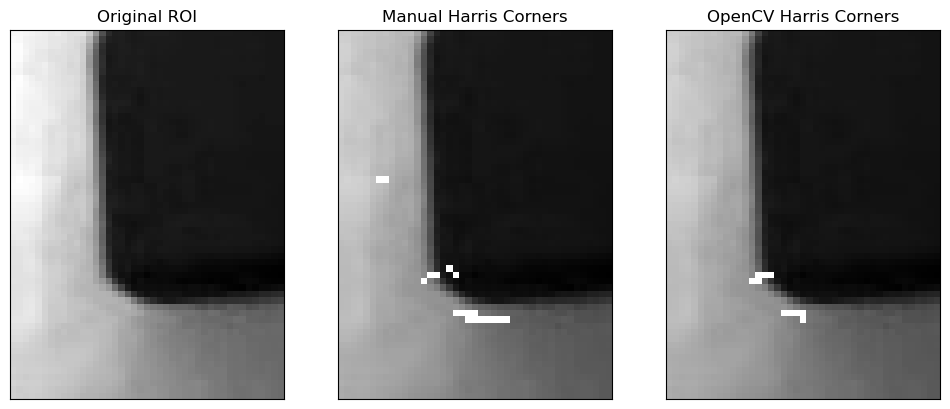

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_harris_corners(img, blockSize, ksize, k):
    # Convert to float as Harris detector requires float32 type
    gray = np.float32(img)
    # Calculate gradients
    dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=ksize)
    dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=ksize)
    # Products of derivatives
    Ixx = dx**2
    Ixy = dx*dy
    Iyy = dy**2
    # Gaussian weights
    Ixx = cv2.GaussianBlur(Ixx, (blockSize, blockSize), 0)
    Ixy = cv2.GaussianBlur(Ixy, (blockSize, blockSize), 0)
    Iyy = cv2.GaussianBlur(Iyy, (blockSize, blockSize), 0)
    # Harris response calculation
    detM = Ixx * Iyy - Ixy**2
    traceM = Ixx + Iyy
    harris_response = detM - k * traceM**2
    return harris_response

# Load image and convert to grayscale
image = cv2.imread('roi.jpg', cv2.IMREAD_GRAYSCALE)

# Parameters for Harris corner detection
blockSize = 3
ksize = 3
k = 0.04

# Manual Harris corner detection
manual_harris = manual_harris_corners(image, blockSize, ksize, k)

# OpenCV Harris corner detection
opencv_harris = cv2.cornerHarris(image, blockSize, ksize, k)

# Threshold for an optimal value, marking the corners on a copy of the original image
img_manual = image.copy()
img_opencv = image.copy()
img_manual[manual_harris > 0.01 * manual_harris.max()] = 255
img_opencv[opencv_harris > 0.01 * opencv_harris.max()] = 255

# Plotting the results using matplotlib
plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original ROI')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_manual, cmap='gray'), plt.title('Manual Harris Corners')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_opencv, cmap='gray'), plt.title('OpenCV Harris Corners')
plt.xticks([]), plt.yticks([])
plt.show()
